In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train[0]

array([6], dtype=uint8)

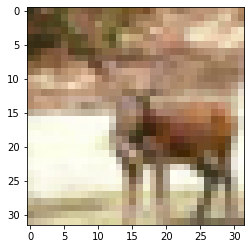

In [9]:
i = 1001
plt.imshow(X_train[i])

In [10]:
print(y_train[i])

[4]


/media/Datos3/anaconda3/envs/gpu/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


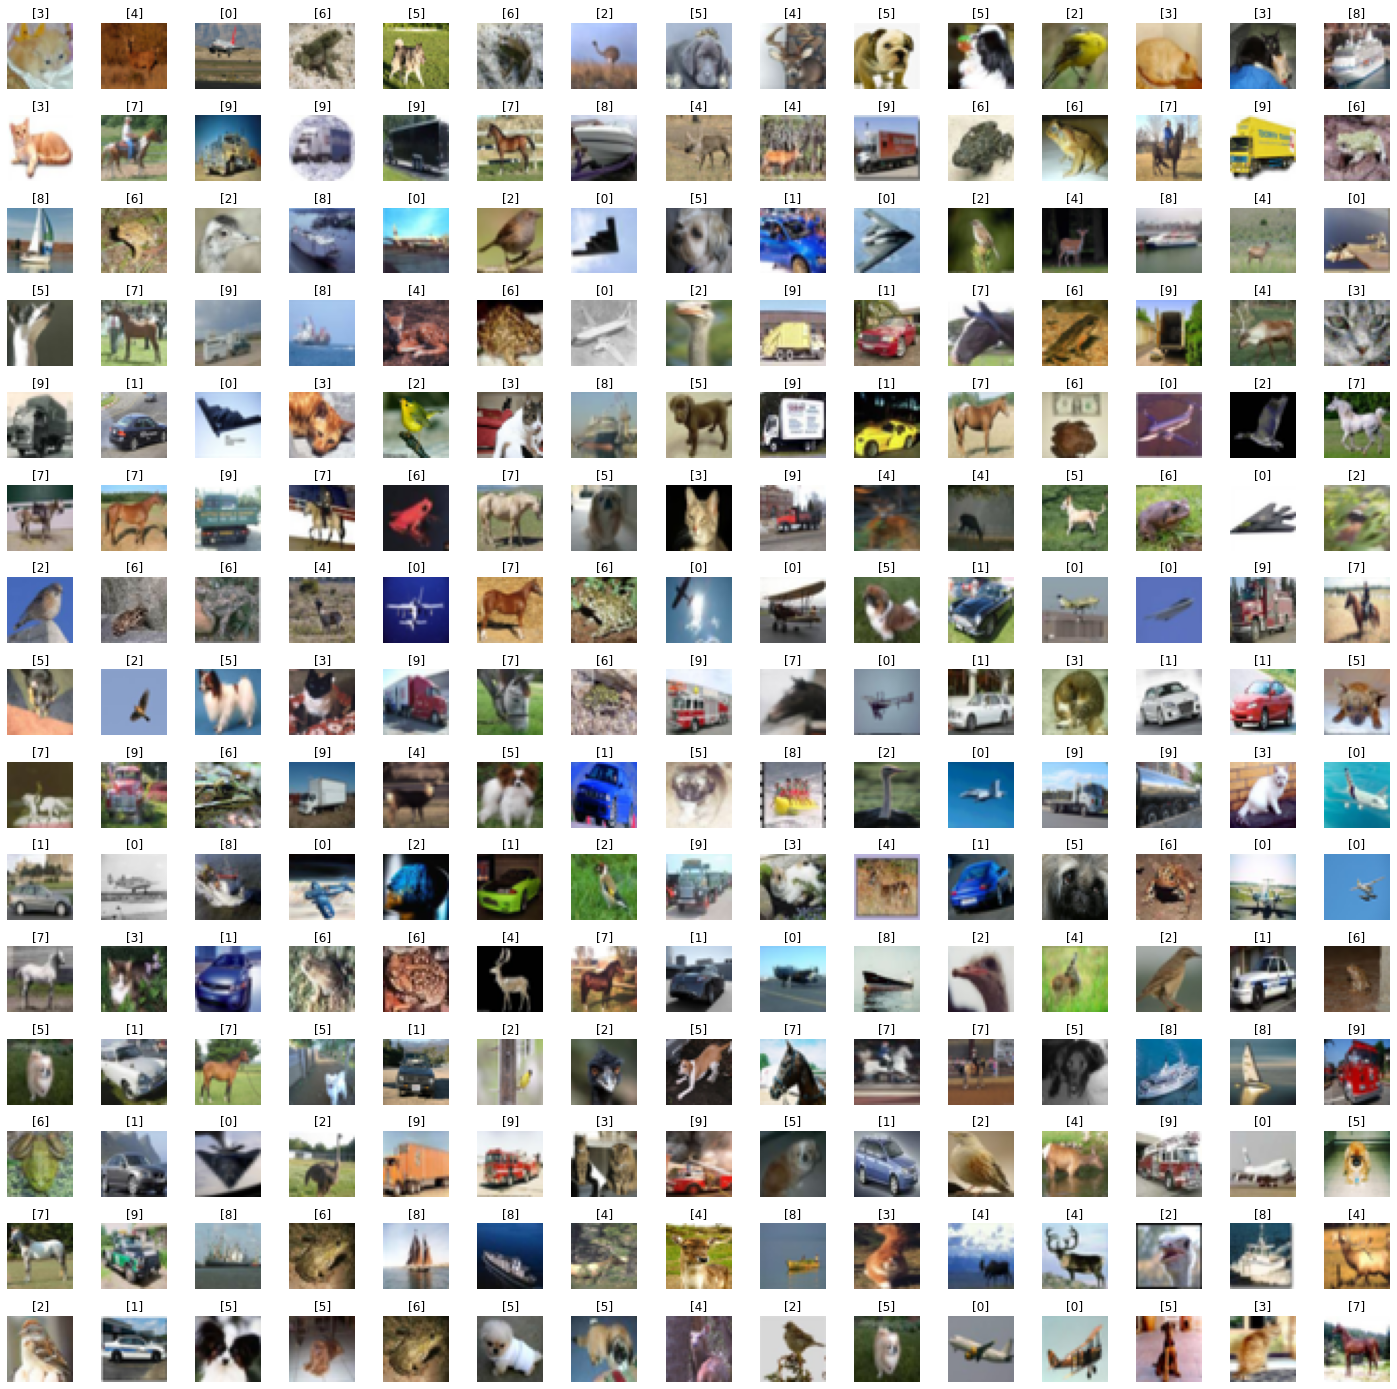

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis("off")

plt.subplots_adjust(hspace=0.4)

In [12]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [13]:
num_cat = 10

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
y_train = tf.keras.utils.to_categorical(y_train, num_cat)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = tf.keras.utils.to_categorical(y_test, num_cat)

In [18]:
X_train.max()

255.0

In [19]:
X_train /= 255

In [20]:
X_test /= 255

In [21]:
X_train.max()

1.0

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
input_shape = X_train.shape[1:]

In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size =(3,3),
                     input_shape=input_shape, activation="relu"))
cnn_model.add(Conv2D(filters=32, kernel_size =(3,3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64, kernel_size =(3,3),activation="relu"))
cnn_model.add(Conv2D(filters=64, kernel_size =(3,3), activation="relu"))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation="relu"))
cnn_model.add(Dense(1024, activation="relu"))

cnn_model.add(Dense(num_cat, activation="softmax"))

In [25]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 64)          0

In [26]:
cnn_model.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                 metrics=["accuracy"])

In [27]:
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32,
                       shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5952 - accuracy: 0.4192
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2232 - accuracy: 0.5745
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0863 - accuracy: 0.6238
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0154 - accuracy: 0.6529
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9934 - accuracy: 0.6638
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9840 - accuracy: 0.6675
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9913 - accuracy: 0.6667
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9799 - accuracy: 0.6748
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9796 - accuracy: 0.6730
Epoch 10/10
1563/1563 [==============================] - 18s 12m